In [1]:
import numpy as np
import lbg_forecast.modified_redshift as mr
import lbg_forecast.modified_bias as mb
from lbg_forecast import modified_probes
from jax_cosmo import probes
from jax_cosmo.angular_cl import angular_cl
from lbg_forecast.modified_angular_cl import noise_cl

import matplotlib.pyplot as plt

import jax
from jax import jit
import jax.numpy as jnp
import jax_cosmo as jc

In [2]:
@jit
def cl_theory(cosmo, mu, sig, ell):

    nz = mr.gauss_nz(mu, sig, gals_per_arcmin2 = 10)

    redshift_distributions = [nz]

    bias = [mb.constant_linear_bias(1.0)]

    cosmo_probes = [probes.NumberCounts(redshift_distributions, bias)]

    signal = angular_cl(cosmo, ell, cosmo_probes)
    noise = noise_cl(ell, cosmo_probes)
    total_cl = signal + noise*0

    return jnp.hstack(total_cl)

In [3]:
ell = jnp.arange(100, 1000, 1)
cl_g = cl_theory(jc.Planck15(), 4.0, 0.5, ell)
cl_g_int = cl_theory(jc.Planck15(), 0.5, 0.1, ell)


/Users/fpetri/anaconda3/envs/tf_env/lib/python3.11/site-packages/jax/_src/numpy/array_methods.py:66: UserWarning: Explicitly requested dtype <class 'jax.numpy.int64'> requested in astype is not available, and will be truncated to dtype int32. To enable more dtypes, set the jax_enable_x64 configuration option or the JAX_ENABLE_X64 shell environment variable. See https://github.com/google/jax#current-gotchas for more.
  return lax_numpy.astype(arr, dtype)


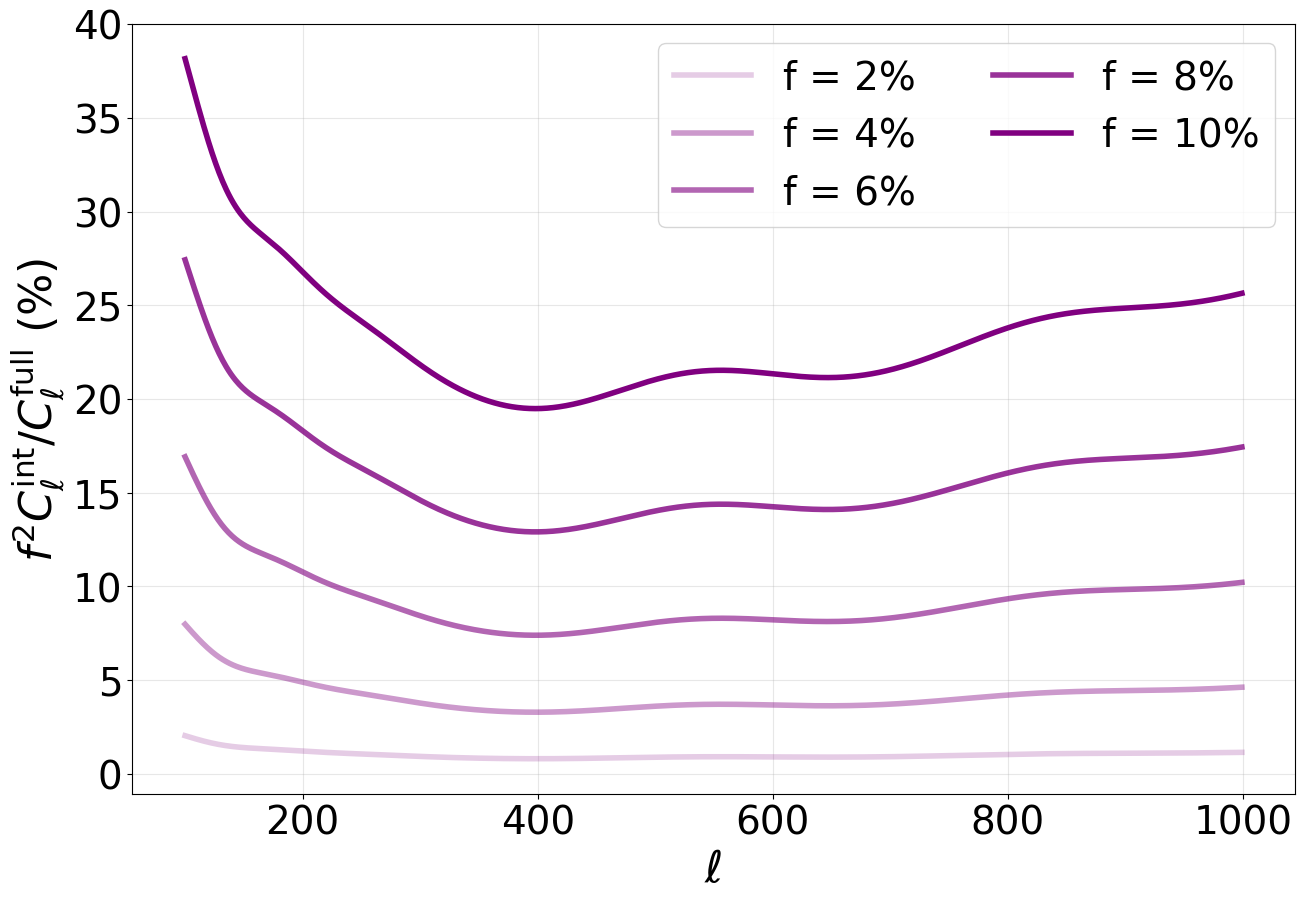

In [17]:
for f in np.array([0.02, 0.04, 0.06, 0.08, 0.10]):
    cl_tot = (f**2)*cl_g_int + ((1-f)**2)*cl_g
    plt.plot(ell, ((f**2)*cl_g_int/cl_tot)*100, label="f = "+str(int(f*100))+"%", alpha=1.0*f/0.1, color='purple', lw=4)


ax = plt.gca()
fig = plt.gcf()
ax.grid(alpha=0.3)
fig.set_size_inches(15, 10)

fs=32
ls=28

plt.ylabel("$f^{2}C^{\mathrm{int}}_{\ell}/C^{\mathrm{full}}_{\ell}$ (%)", fontsize=fs)
plt.xlabel("$\ell$", fontsize=fs)

ax.legend(ncols=2, fontsize=ls)

plt.tick_params('x', labelsize=ls)
plt.tick_params('y', labelsize=ls)

Text(0.5, 0, '$z$')

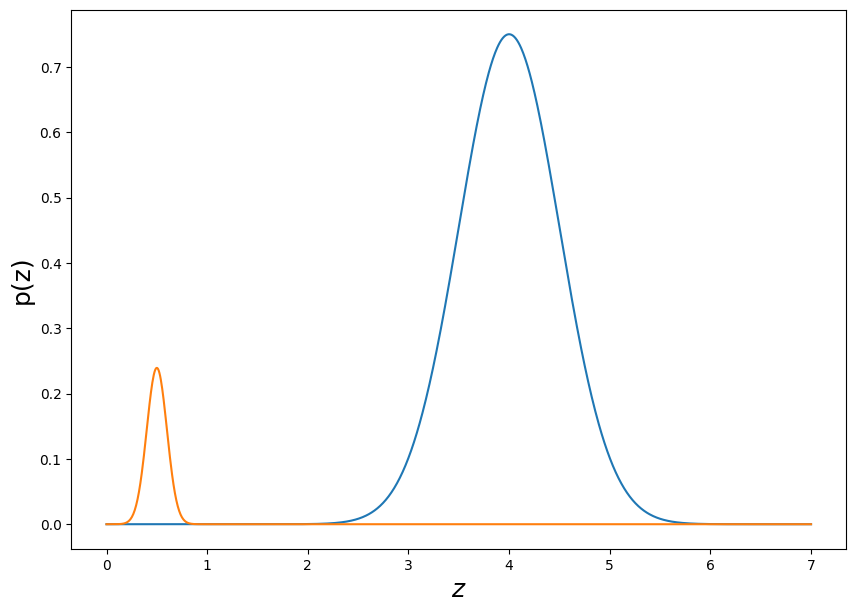

In [5]:
fig, ax1 = plt.subplots(figsize = (10, 7))

f=0.06
mu1, sigma1, mu2, sigma2 = 0.5, 0.1, 4, 0.5 
bias_val_full = 1
bias_val_LBG, bias_val_int = 1, 1

z_space = jnp.linspace(0, 7, 1000)
nz_int = mr.gauss_nz(0.5, 0.1)
nz_lbg = mr.gauss_nz(4.0, 0.5)

gauss_int = nz_int.pz_fn(z_space)*f
gauss_lbg = nz_lbg.pz_fn(z_space)*(1-f)

#nz_full = nz_tot(mu1, sigma1, mu2, sigma2, f, z_space)

plt.plot(z_space, gauss_lbg)
plt.plot(z_space, gauss_int)
#plt.plot(z_space, nz_full)

plt.ylabel("p(z)", fontsize=18)
plt.xlabel("$z$", fontsize=18)